Importamos las librerias que necesitamos



In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import math

!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 5.37 MiB/s, done.
Resolving deltas: 100% (150/150), done.


Funcion de calcular distancia entre 2 puntos

In [5]:
def dist(cp1, cp2):
  la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)

In [2]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [ ]:
print(len(poblacionesDF))
poblacionesDF.head()

In [ ]:
nomprovincias = poblacionesDF['PROVINCIA'].unique()
print(len(nomprovincias))
nomprovincias

In [ ]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

In [7]:
nom_distrito = 'HUANTA'

nomdistritos = provincias[nom_distrito]['DISTRITO'].unique()
print(len(nomdistritos))
nomdistritos

1


array(['HUANTA'], dtype=object)

In [8]:
distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias['HUANTA'][provincias['HUANTA']['DISTRITO'] == nom]
  print(nom, len(distritos[nom]))

HUANTA 7


In [9]:
distrito = distritos['HUANTA']

G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  print(cp1[col])
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))

CALLQUI
CCANIS
HUANTA
PALMAYOCC
SOCCOSCCOCHA
UCHCUMARCA
VISTA ALEGRE


Mostrar el grafo de los centros poblados

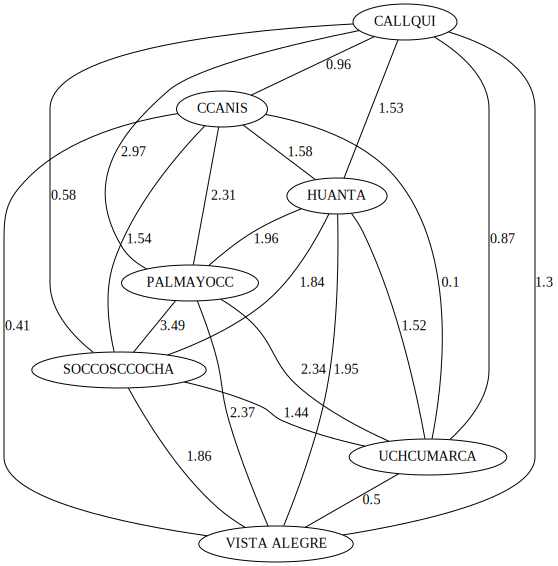

In [11]:
gs.nx2gv(G, weighted=True, params={'size':'15'})

Implementacion del algoritmo DFS

In [12]:
def _dfs(G, u):
    min = math.inf
    sig = None
    if not G.nodes[u]['visited']:
        G.nodes[u]['visited'] = True
        for v in G.neighbors(u):
            for edge in G.edges(u):
                if v == edge[1] and G.edges[u, v]['weight'] < min and not G.nodes[v]['visited']:
                    min = G.edges[u, v]['weight']
                    sig = v
                    G.nodes[sig]['π'] = u
                    _dfs(G, sig)
    
def dfs(G, s):
    for u in G.nodes:
        G.nodes[u]['visited'] = False
        G.nodes[u]['π'] = -1
    _dfs(G, s)

Comprobando el algoritmo

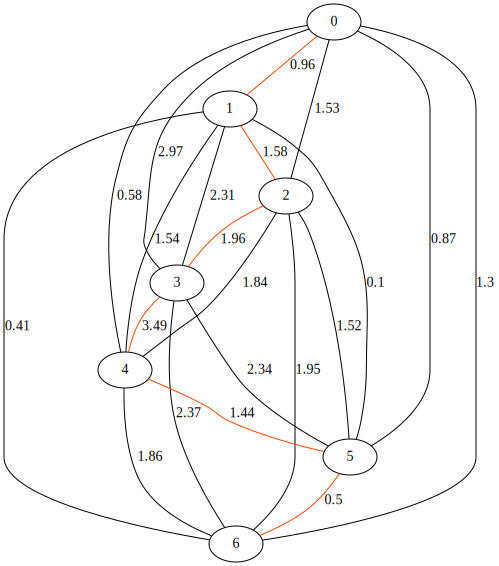

In [14]:
distrito = distritos['HUANTA']


G = nx.Graph()
col = 'CENTRO POBLADO'
index = distrito.index[0]
for i, cp1 in distrito.iterrows():
    G.add_node(i-index, label=cp1[col])
for i, cp1 in distrito.iterrows():
    for j, cp2 in distrito.iterrows():
        if cp1[col] != cp2[col]: 
            G.add_edge(i-index, j-index, weight=dist(cp1, cp2))

dfs(G, 0)

path = [0]*G.number_of_nodes()

for v, info in G.nodes.data():
    path[v] = int(info['π'])

gs.nx2gv(G, path=path, weighted=True, params={'size':'20'})